In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./MFGEmployees4.csv')

In [3]:
df.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

In [5]:
mask1 = df['AbsentHours'] >= 94.28 
mask2 = df['AbsentHours'] == 0

df['MostAbsent'] = mask1
df['NoAbsent'] = mask2

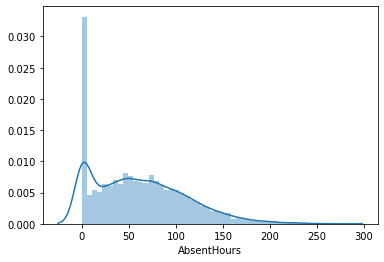

In [6]:
sns.distplot(df['AbsentHours'],bins=50)

In [7]:
df.nunique().sort_values(ascending=False)

EmployeeNumber    8336
LengthService     8301
Age               8298
AbsentHours       7016
Surname           4051
GivenName         1625
City               243
JobTitle            47
StoreLocation       40
DepartmentName      21
Division             6
NoAbsent             2
MostAbsent           2
BusinessUnit         2
Gender               2
dtype: int64

#### Job

In [8]:
jt = df['JobTitle'].value_counts()
jt = jt.head(6).index

df['Job'] = np.where(df['JobTitle'].isin(jt),df['JobTitle'],'Other')

In [9]:
df['Job'].value_counts().sort_index()

Baker            1404
Cashier          1703
Dairy Person     1514
Meat Cutter      1480
Other             394
Produce Clerk    1129
Shelf Stocker     712
Name: Job, dtype: int64

#### Department

In [12]:
dn = df['DepartmentName'].value_counts().head(5).index
df['Department'] = np.where(df['DepartmentName'].isin(dn),df['DepartmentName'],'Other')

#### Drop unwanted columns

In [13]:
df.nunique().sort_values(ascending=False)

EmployeeNumber    8336
LengthService     8301
Age               8298
AbsentHours       7016
Surname           4051
GivenName         1625
City               243
JobTitle            47
StoreLocation       40
DepartmentName      21
Job                  7
Department           6
Division             6
BusinessUnit         2
Gender               2
MostAbsent           2
NoAbsent             2
dtype: int64

In [14]:
df = df.drop(columns=['JobTitle','City','Surname','StoreLocation','GivenName','DepartmentName'])

In [15]:
cat_cols = df.select_dtypes(exclude='number').columns
cat_cols

Index(['Gender', 'Division', 'BusinessUnit', 'MostAbsent', 'NoAbsent', 'Job',
       'Department'],
      dtype='object')

In [16]:
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)
df.columns

Index(['EmployeeNumber', 'Age', 'LengthService', 'AbsentHours', 'Gender_M',
       'Division_FinanceAndAccounting', 'Division_HumanResources',
       'Division_InfoTech', 'Division_Legal', 'Division_Stores',
       'BusinessUnit_Stores', 'MostAbsent_True', 'NoAbsent_True',
       'Job_Cashier', 'Job_Dairy Person', 'Job_Meat Cutter', 'Job_Other',
       'Job_Produce Clerk', 'Job_Shelf Stocker', 'Department_Customer Service',
       'Department_Dairy', 'Department_Meats', 'Department_Other',
       'Department_Produce'],
      dtype='object')

In [17]:
X = df.drop('AbsentHours',axis=1)
y = df['AbsentHours']

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = [variance_inflation_factor(X.values,i) for i,_ in enumerate(X)]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
EmployeeNumber,5.151232
Age,44.450459
LengthService,7.581929
Gender_M,2.123064
Division_FinanceAndAccounting,2.432353
Division_HumanResources,2.974516
Division_InfoTech,1.194473
Division_Legal,1.055151
Division_Stores,inf
BusinessUnit_Stores,inf


In [20]:
X.drop(columns=['Division_Stores'],inplace=True)

In [21]:
vif = [variance_inflation_factor(X.values,i) for i,_ in enumerate(X)]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
EmployeeNumber,5.151232
Age,44.450459
LengthService,7.581929
Gender_M,2.123064
Division_FinanceAndAccounting,2.432353
Division_HumanResources,2.974516
Division_InfoTech,1.194473
Division_Legal,1.055151
BusinessUnit_Stores,48.199884
MostAbsent_True,2.328421


In [22]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y,xc).fit()
# print(lin_reg.params)
y_pred = lin_reg.predict()
# y_pred

In [23]:
r2_score(y,y_pred)

0.8427890687786813

In [24]:
y

0        36.577306
1        30.165072
2        83.807798
3        70.020165
4         0.000000
           ...    
8331     93.665111
8332      0.000000
8333    176.356940
8334     60.321917
8335    112.023389
Name: AbsentHours, Length: 8336, dtype: float64

In [25]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AbsentHours   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2026.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:56:13   Log-Likelihood:                -36565.
No. Observations:                8336   AIC:                         7.318e+04
Df Residuals:                    8313   BIC:                         7.334e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -37.1308      6.613     -5.615      0.000     -50.094     -24.168
EmployeeNumber                -2.353e-05      0.000     -0.234      0.815      -0.000       0.000
Age                               2.3461      0.034     69.471      0.000       2.280       2.412
LengthService                    -0.4706      0.111     -4.247      0.000      -0.688      -0.253
Gender_M                         -9.8934      0.437    -22.643      0.000     -10.750      -9.037
Division_FinanceAndAccounting   -15.9020      6.299     -2.525      0.012     -28.249      -3.555
Division_HumanResources         -14.4895      6.337     -2.287      0.022     -26.911      -2.068
Division_InfoTech                -3.0796      8.508     -0.362      0.717     -19.758      13.599
Division_Legal                    1.6591     12.683      0.131      0.896     -23.204      26.522
BusinessUnit_Stores              -1.6915      6.341     -0.267      0.790     -14.121      10.738
MostAbsent_True                  49.9832      0.656     76.230      0.000      48.698      51.269
NoAbsent_True                   -21.2798      0.727    -29.262      0.000     -22.705     -19.854
Job_Cashier                      -2.9875      4.481     -0.667      0.505     -11.772       5.796
Job_Dairy Person                -41.6320     19.706     -2.113      0.035     -80.261      -3.003
Job_Meat Cutter                  -1.0281      4.484     -0.229      0.819      -9.818       7.762
Job_Other                        -4.8518      2.955     -1.642      0.101     -10.644       0.940
Job_Produce Clerk                -4.0203      4.493     -0.895      0.371     -12.828       4.787
Job_Shelf Stocker                -6.5619      3.808     -1.723      0.085     -14.026       0.902
Department_Customer Service       3.2305      4.425      0.730      0.465      -5.443      11.904
Department_Dairy                 42.3999     19.692      2.153      0.031       3.798      81.002
Department_Meats                  0.5980      4.425      0.135      0.893      -8.076       9.272
Department_Other                  6.3723      3.690      1.727      0.084      -0.862      13.606
Department_Produce                3.4649      4.425      0.783      0.434      -5.208      12.138
==============================================================================
Omnibus:                      140.755   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.758
Skew:                           0.265   Prob(JB):                     1.67e-36
Kurtosis:                       3.441   Cond. No.                     6.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

## Linear regression Machine learning

In [26]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_split())